Ngram function from: https://www.analyticsvidhya.com/blog/2021/09/what-are-n-grams-and-how-to-implement-them-in-python/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# This package is so we can parse out "stop words". Words like "the", "and", etc.
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# nltk.download('stopwords')

In [3]:
# This function will parse our tweets into "ngrams". These can be single words (1-grams), pairs (2-grams), 
# or any length of sets of words.

from string import punctuation 
import re
def generate_N_grams(text,ngram=1):
    
    # check if text is NaN
    if type(text) != str:
        return ""
    
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower() # convert text to lower-case
#      # Remove non-alphanumeric characters
    text = word_tokenize(text) # remove repeated characters (helloooooooo into hello)

    stop_words = set(stopwords.words('english') + list(punctuation) + ['would', 'could', 'im' , 'got', 'get' , 'ive' , 'go'])

    words=[word for word in text if word not in stop_words]  
    print("Sentence after removing stopwords:",words)
    temp=zip(*[words[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    return ans

In [4]:
# read csv file into a pandas dataframe
p_df = pd.read_csv('p_CleanContent.csv', index_col=False)
c_df = pd.read_csv('c_CleanContent.csv', index_col=False)


display(len(p_df))
display(c_df.head(3))

1958

,post_id,comment_id,content
0,10y47g3,j7w1hrz,Congratulations and best of luck to you!
1,10y47g3,j7x0e1e,Congrats! That’s a huge accomplishment. Feel g...
2,10y47g3,j7wr67b,This is the way!!


We want to identify the most frequently used words for both neutral tweets, and those associated with depression

In [5]:
p_title = p_df['post_title']
display(p_title)

0                 Finally got my driver's license again!!
1       Spent first night unprepared for cold thunders...
2       58-year-old homeless man Lee Stewart died afte...
3       After being homeless for over a year, I have a...
4       Have you ever been homeless in a very rich tow...
                              ...                        
1953                                 Just a big thank you
1954       After a year I'm going to have my own place...
1955    Double the value of SNAP at some farmers marke...
1956                         No good deed goes unpunished
1957                                                  God
Name: post_title, Length: 1958, dtype: object

In [6]:
p_content = p_df['post_Content']
c_content = c_df['content']

display(p_content)
display(c_content)

0       Wooton! I'm stoked, the car has insurance and ...
1       Yesterday, the guy who works at the storage un...
2                                                     NaN
3       I got a bed in a sort of assisted living facil...
4       For a lot of people, it's way easier to be hom...
                              ...                        
1953    Last nite, I was out working the streets, kind...
1954    After a year of being homeless and stuck in Ch...
1955                                                  NaN
1956    The discrimination sucks. My new years Eve sta...
1957    God told me to be homeless because it's steali...
Name: post_Content, Length: 1958, dtype: object

0                Congratulations and best of luck to you!
1       Congrats! That’s a huge accomplishment. Feel g...
2                                       This is the way!!
3                                               HUGE win!
4                                        Congratulations!
                              ...                        
6014                                       Too many rules
6015    learning which is "how to live and how to feel...
6016    Simple as some just don’t wanna deal with rule...
6017    Many are addicts that would need a medical det...
6018    I was able to get into a shelter right before ...
Name: content, Length: 6019, dtype: object

In [36]:
ngrams_p_title = {}

for t in p_title:
    
    ind_ngrams = generate_N_grams(t,1)
    
    for i in ind_ngrams:
        if i in ngrams_p_title.keys():
            ngrams_p_title[i]+=1
        else:
            ngrams_p_title[i]=1
            
# print(ngrams_p_title)

Sentence after removing stopwords: ['finally', 'drivers', 'license']
Sentence after removing stopwords: ['spent', 'first', 'night', 'unprepared', 'cold', 'thunderstorm']
Sentence after removing stopwords: ['58yearold', 'homeless', 'man', 'lee', 'stewart', 'died', 'fell', 'asleep', 'inside', 'dumpster', 'crushed', 'death', 'garbage', 'truck']
Sentence after removing stopwords: ['homeless', 'year', 'place', 'live']
Sentence after removing stopwords: ['ever', 'homeless', 'rich', 'townneighborhood']
Sentence after removing stopwords: ['need', 'someone', 'talk']
Sentence after removing stopwords: ['anxiety', 'homeless']
Sentence after removing stopwords: ['swear', 'honest', 'interviews', 'gets', 'theses', 'fucking', 'people', 'want', 'young', 'people', 'one', 'interview', 'tomorow', 'dont', 'may', 'well', 'commit', 'suicide', 'already', 'already', 'coming', 'terms', 'starting', 'accept']
Sentence after removing stopwords: ['working', 'place', 'stay']
Sentence after removing stopwords: ['dri

Sentence after removing stopwords: ['rand', 'survey', 'finds', 'homelessness', '18', 'la', 'hot', 'spots', 'official', 'count', 'recorded', 'decreases']
Sentence after removing stopwords: ['believe', 'know']
Sentence after removing stopwords: ['boulder', 'residents', 'host', 'meeting', 'discuss', 'socalled', 'highutilizers']
Sentence after removing stopwords: ['homeless', 'dog', 'sf', 'vs', 'denver', 'help']
Sentence after removing stopwords: ['couple', 'tips', 'tents', 'winter', 'youve', 'cold']
Sentence after removing stopwords: ['people', 'willing', 'help', 'abandoned', 'cats', 'dog', 'problem', 'driving', 'ignoring', 'homeless', 'people', 'asking', 'dollar', 'food']
Sentence after removing stopwords: ['phoenixashes', 'tiktok', 'phoenix', 'ashes', 'homeless', 'bike', 'campers', 'end', 'homelessness']
Sentence after removing stopwords: ['ontario', 'canada', 'possibly', 'transitioning', 'vancouver', 'canada']
Sentence after removing stopwords: ['alternatives', 'shelters']
Sentence aft

Sentence after removing stopwords: ['couch', 'hopping', 'going', 'bad']
Sentence after removing stopwords: ['rising', 'rent', 'poverty', 'real', 'driver', 'homelessness']
Sentence after removing stopwords: ['homeless', 'surgery']
Sentence after removing stopwords: ['crowdtap', 'scam']
Sentence after removing stopwords: ['panhandling', 'tips', 'extreme', 'introvert']
Sentence after removing stopwords: ['remote', 'jobs']
Sentence after removing stopwords: ['soon', 'homeless']
Sentence after removing stopwords: ['soontobe', 'homeless', 'need', 'advice']
Sentence after removing stopwords: ['advice']
Sentence after removing stopwords: ['facing', 'eviction', 'long']
Sentence after removing stopwords: ['politicians']
Sentence after removing stopwords: ['whats', 'plan', 'housedchange', 'situation', 'year']
Sentence after removing stopwords: ['homelessness', 'crime', 'missouri']
Sentence after removing stopwords: ['kinds', 'food', 'keep', 'pack']
Sentence after removing stopwords: ['someone', '

Sentence after removing stopwords: ['hopeless', 'vent']
Sentence after removing stopwords: ['advice', 'helping', 'effectively']
Sentence after removing stopwords: ['avoided', 'sweep', 'today']
Sentence after removing stopwords: ['new', 'movie', 'public', 'mirrors', 'harsh', 'realities', 'homelessness']
Sentence after removing stopwords: ['homeless', 'blessed', 'enough', 'car', 'advice', 'living', 'vehicle']
Sentence after removing stopwords: ['scared']
Sentence after removing stopwords: ['didnt', 'know', 'already', 'rain', 'cold', 'arent', 'good', 'combination']
Sentence after removing stopwords: ['homeless', 'days', 'need', 'advice']
Sentence after removing stopwords: ['day', '19', 'homeless']
Sentence after removing stopwords: ['woke', 'beach', 'damp', 'clothing', 'bags', 'thankfully', 'able', 'find', 'area', 'shelter']
Sentence after removing stopwords: ['benches']
Sentence after removing stopwords: ['help', 'homeless', 'people', 'shivering', 'denver', 'cold']
Sentence after removin

Sentence after removing stopwords: ['suggestions', 'showers']
Sentence after removing stopwords: ['places', 'park', 'outside', 'nyc']
Sentence after removing stopwords: ['orenda', 'project']
Sentence after removing stopwords: ['sleep', 'setup']
Sentence after removing stopwords: ['used', 'homeless', 'open', 'food', 'cabinet']
Sentence after removing stopwords: ['longer', 'engage', 'commercetransactions', 'labor']
Sentence after removing stopwords: ['woke', 'like']
Sentence after removing stopwords: ['flashback', 'final', 'fantasy', 'vii']
Sentence after removing stopwords: ['genuinely', 'seeking', 'understanding']
Sentence after removing stopwords: ['us', 'needs', 'look', 'people', 'rather', 'spend', 'money', 'unipolar', 'military', 'empire']
Sentence after removing stopwords: ['flush', 'app', 'finding', 'nearest', 'toilets']
Sentence after removing stopwords: ['noticed', 'lot', 'shelter', 'staff', 'think', 'homelessness', 'individual', 'vs', 'systemic', 'one']
Sentence after removing 

Sentence after removing stopwords: ['california', 'college', 'allowing', 'homeless', 'students', 'sleep', 'cars', 'parking', 'garage', 'wifi', 'bathroom', 'access']
Sentence after removing stopwords: ['community', 'center', 'city', 'offers', 'breakfasts', 'like', 'every', 'day', 'exactly', '2', 'id', 'say', 'steal', 'huge', 'lifesaver', 'homeless', 'area', 'anyone', 'else', 'amazingly', 'valued', 'meals', 'like', 'live']
Sentence after removing stopwords: ['4', 'years', 'drinking', '2', 'years', 'car', 'living', '1', 'time', 'feel', 'like', 'winning']
Sentence after removing stopwords: ['clothes', 'stolen', 'cops', 'wont', 'shit', 'fuck', 'life']
Sentence after removing stopwords: ['first', 'night', 'living', 'car']
Sentence after removing stopwords: ['please', 'vote']
Sentence after removing stopwords: ['currently', 'staying', 'mentally', 'ill', 'person', 'laughs', 'day', 'scared', 'lol', 'least', 'cold', 'rain']
Sentence after removing stopwords: ['sleep', 'shelter', 'one', 'many', '

Sentence after removing stopwords: ['know', 'pandemic', 'people', 'acting', 'different', 'thank', '4', 'people', 'helped', 'food', 'yesterday']
Sentence after removing stopwords: ['times', 'tough', 'trying', 'happy']
Sentence after removing stopwords: ['piss', 'anyone', 'else', 'rich', 'america', 'individuals', 'millions', 'billions', 'wealth', 'yet', 'theres', 'many', 'homeless', 'peoplepoverty']
Sentence after removing stopwords: ['900', 'ebt']
Sentence after removing stopwords: ['home', 'turned', '150k', 'tonight']
Sentence after removing stopwords: ['way']
Sentence after removing stopwords: ['cajun', 'potato', 'salad', 'veggie', 'mix', 'living', 'large']
Sentence after removing stopwords: ['homeless']
Sentence after removing stopwords: ['living', 'large', 'tonight', 'ladies', 'gents']
Sentence after removing stopwords: ['fellow', 'portlanders', 'showers']
Sentence after removing stopwords: ['another', 'tooth', 'pulled', 'hurts', 'much']
Sentence after removing stopwords: ['excellen

Sentence after removing stopwords: ['someone', 'care', 'lot', 'place', 'live', 'soon']
Sentence after removing stopwords: ['wow']
Sentence after removing stopwords: ['3', 'years', 'outside', 'camping', 'finally', 'able', 'afford', 'save', 'used', 'volvo', 'xc90very', 'spacious', 'tinted', 'windowsfor', 'us', 'homeless', 'people', 'little', 'metal', 'box', 'game', 'changerslept', 'good', 'first', 'time', 'years']
Sentence after removing stopwords: ['hey', 'guys', 'want', 'superhero', 'wears', 'costume', 'gos', 'helps', 'homeless', 'need', 'know', 'many', 'people', 'homeless', 'area', 'guys', 'help', 'find', 'many', 'people', 'homeless', 'fraser', 'michigan', 'clinton', 'township', 'michigan', 'detroit', 'michigan']
Sentence after removing stopwords: ['stay', 'safe', 'tonight']
Sentence after removing stopwords: ['legal', 'homeless', 'family', 'traveling', 'across', 'america', 'bus', 'van', 'care', 'pistol', 'shotgun', 'selfdefense']
Sentence after removing stopwords: ['tourist', 'town',

Sentence after removing stopwords: ['homelessness', 'legalized', 'homicide']
Sentence after removing stopwords: ['big', 'thank']
Sentence after removing stopwords: ['year', 'going', 'place']
Sentence after removing stopwords: ['double', 'value', 'snap', 'farmers', 'markets', 'grocery', 'stores']
Sentence after removing stopwords: ['good', 'deed', 'goes', 'unpunished']
Sentence after removing stopwords: ['god']


In [37]:
ngrams_p_content = {}

for t in p_content:
    
    ind_ngrams = generate_N_grams(t,3)
    
    for i in ind_ngrams:
        if i in ngrams_p_content.keys():
            ngrams_p_content[i]+=1
        else:
            ngrams_p_content[i]=1
            
# print(ngrams_p_content)

Sentence after removing stopwords: ['wooton', 'stoked', 'car', 'insurance', 'registration', 'live', 'sedan', 'feeling', 'blessed', 'today']
Sentence after removing stopwords: ['yesterday', 'guy', 'works', 'storage', 'unit', 'keep', 'things', 'sleep', 'read', 'decided', 'lock', 'completely', 'without', 'even', 'telling', 'lock', 'cut', 'red', 'one', 'placed', 'access', 'nothing', 'last', 'night', 'toiletries', 'sleeping', 'bag', 'water', 'clothes', 'etc', 'basically', 'taken', 'pissed', 'know', 'wasnt', 'legal', 'guy', 'said', 'gon', 'na', 'turn', 'blind', 'eye', 'caught', 'coworkers', 'yet', 'kept', 'going', 'way', 'making', 'random', 'comments', 'issues', 'suddenly', 'locked', 'completely', 'wasnt', 'dressed', 'correctly', 'weather', 'last', 'night', 'interview', 'morning', 'library', 'came', 'back', 'saw', 'happened', 'way', 'change', 'anything', 'thicker', 'knew', 'place', 'new', 'city', 'soo', 'frustrated', 'especially', 'cause', 'unit', '10', 'days', 'ago', 'never', 'bothered', 's

Sentence after removing stopwords: ['hi', 'guys', 'difficult', 'living', 'situation', 'moment', 'trying', 'break', 'free', 'dont', 'options', 'people', 'live', 'right', 'exploring', 'whats', 'almost', 'money', 'savings', 'delivery', 'driver', 'make', 'money', 'time', 'denver', 'thinking', 'going', 'san', 'francisco', 'trying', 'live', 'city', 'easier', 'faster', 'solid', 'housing', 'forth', 'interested', 'safe', 'decent', 'shelters', 'places', 'stay', 'right', 'bat', 'hopefully', 'getting', 'good', 'housing', 'asap', 'want', 'street', 'dont', 'think', 'make', 'far', 'help', 'appreciated', 'thanks']
Sentence after removing stopwords: ['live', 'frozen', 'tundra', 'north', '3040f', 'windchill', 'winter', 'heres', 'couple', 'tips', 'insulating', 'tent', 'increase', 'warmth', 'homeless', 'going', '2', 'years', 'dumpster', 'dive', 'hit', 'recycling', 'bins', 'find', 'cardboard', 'often', 'times', 'styrofoam', 'layer', 'styrofoam', 'first', 'cardboard', 'help', 'retain', 'warmth', 'tent', 'in

Sentence after removing stopwords: ['look', 'dont', 'streets', 'nobodys', 'mom', 'really', 'guy', 'panhandle', 'right', 'front', 'place', 'busking', 'frustrating', 'thing', 'people', 'ended', 'giving', 'money', 'successful', 'panhandling', 'efforts', 'nice', 'people', 'everything', 'going', 'ppls', 'space', 'aint', 'chief', 'especially', 'theyre', 'actually', 'trying', 'actively', 'something', 'earn', 'money', 'dont', 'feel', 'bad', 'asking', 'ppl', 'help', 'thats', 'thats', 'rant']
Sentence after removing stopwords: ['worried', 'becoming', 'homeless', 'since', 'work', 'constantly', 'job', 'make', 'every', 'month', 'getting', 'burned', 'schizophrenia', 'diagnosis', 'cant', 'join', 'military', 'programs', 'jobs', 'people', 'provide', 'housing', 'also', '32', 'years', 'old']
Sentence after removing stopwords: ['greetings', 'hope', 'youre', 'staying', 'warm', 'occurred', 'morning', 'held', 'keys', 'new', 'house', 'hand', 'lucky', 'permanently', 'removed', 'situation', 'previously', 'day',

Sentence after removing stopwords: ['happy', 'holidays', 'everyone', 'ik', 'may', 'cheerful', 'homeless', '201718', '17yrs', 'old', 'living', 'new', 'england', 'winters', 'etc', 'horrible', '22', 'longer', 'homeless', 'like', 'give', 'back', 'unfortunately', 'wealthy', 'like', 'youtubers', 'give', 'away', 'hundreds', 'dollars', 'feed', 'hundreds', 'familiesbut', 'buy', 'supplies', 'actually', 'already', 'create', 'homemade', 'holiday', 'cards', 'homeless', 'community', 'around', 'city', 'making', 'post', 'spare', 'seconds', 'day', 'write', 'short', 'comment', 'write', 'one', 'cards', 'imagine', 'without', 'friends', 'loved', 'ones', 'even', 'phone', 'visit', 'reddit', 'groups', 'meet', 'mutual', 'genuinely', 'alone', 'nothing', 'bodies', 'minds', 'holiday', 'season', 'least', 'community', 'offer', 'loving', 'words', 'encouragement', 'maybe', 'give', 'smile', 'much', 'needed', 'holiday', 'season', 'comment', 'write', 'ill', 'make', 'sure', 'put', 'personalized', 'hand', 'written', 'deco

Sentence after removing stopwords: ['anyone', 'lived', 'pros', 'cons', 'one', 'bettersafereasier', 'imagine', 'homeless', 'city', 'daily', 'life', 'consists', 'homeless', 'shelters', 'camping', 'woods', 'night', 'soup', 'kitchens', 'thrift', 'shops', 'gyms', 'public', 'libraries', 'plus', 'panhandling', 'dumpsterdiving', 'looking', 'work', 'flying', 'sign', 'guess', 'homeless', 'vagabondnomad', 'day', 'consists', 'hopping', 'trains', 'hitchhiking', 'hanging', 'truckstops', 'beggingworking', 'meals', 'various', 'restaurants', 'sleeping', 'woods', 'motels', 'getting', 'see', 'country', 'etc', 'guess', 'years', 'disabled', 'better', 'city', 'close', 'resources', 'young', 'healthy', 'maybe', 'vagnomad', 'better', 'option', 'dont', 'know', 'thoughts', 'thank', 'reading']
Sentence after removing stopwords: ['homeless', 'living', 'area', 'lot', 'homeless', 'people', 'apartment', 'moving', 'several', 'homeless', 'encampments', 'going', 'several', 'blocks', 'starting', 'pretty', 'cold', 'outsid

Sentence after removing stopwords: ['every', 'single', 'shelter', 'iv', 'staff', 'never', 'thinks', 'homelessness', 'systemic', 'issue', 'makes', 'wonder', 'want', 'job', 'like', 'blatantly', 'obviously', 'dont', 'care', 'us', 'staff', 'ex', 'homeless', 'mindset', 'pull', 'homelessness', 'surely', 'everyone', 'else', 'way', 'suck', 'dicks', 'everyone', 'else', 'staff', 'wise', 'baffles', 'truly']
Sentence after removing stopwords: ['anybody', 'like', 'read', 'story', 'assuming', 'youre', 'might', 'cramped', 'laying', 'back', 'car', 'laying', 'bench', 'sitting', 'outside', 'building', 'tent', 'hungry', 'maybe', 'youve', 'escaped', 'pitfall', 'life', 'maybe', 'youre', 'interested', 'issue', 'homeless', 'year', 'entire', 'year', 'many', 'people', 'homeless', 'longer', 'large', 'guess', 'majority', 'people', 'terminally', 'homeless', 'due', 'variety', 'issues', 'genuine', 'health', 'issues', 'mental', 'cognitive', 'disorders', 'otherwise', 'prevent', 'ever', 'able', 'job', 'addicts', 'seen

Sentence after removing stopwords: ['currently', 'homeless', 'night', '2am', 'shelters', 'closed', 'anyone', 'good', 'safe', 'ideas', 'use', 'help', 'afford', 'hotel', 'hostel', 'bnb', 'night', 'uk', 'based']
Sentence after removing stopwords: ['homeless', 'lonely', 'anyone', 'chat']
Sentence after removing stopwords: ['sure', 'kanye', 'west', 'may', 'annoying', 'may', 'even', 'true', 'words', 'read', 'hes', 'hes', 'holding', 'fashion', 'show', 'skid', 'row', 'la', 'proceeds', 'homeless', 'funds', 'vague', 'celebs', 'general', 'lend', 'hand']
Sentence after removing stopwords: ['homeless', 'bit', 'barely', 'getting', 'sleep', 'days', 'thanks', 'blessing', 'came', 'life', 'yesterday', 'able', 'motel', 'room', 'week', 'waking', 'full', 'sleep', 'feel', 'like', 'super', 'powers', 'point', 'bad', 'guy', 'lets', 'goo']
Sentence after removing stopwords: ['saw', 'news', 'clearing', 'homeless', 'camps', 'around', 'stadium', 'super', 'bowl', 'played', 'excuse', 'gave', 'beyond', 'lame', 'said'

Sentence after removing stopwords: ['please', 'let', 'know', 'pack', 'bookbags', 'handing', 'homeless', 'hand', 'goods', 'bookbag', 'normal', 'bag', 'correct', 'way', 'give', 'someone', 'dont', 'want', 'something', 'mistake', 'feel', 'offended', 'bookbags', 'dropped', 'theyre', 'sleeping', 'hand', 'straight', 'ask', 'first']
Sentence after removing stopwords: ['finally', 'employed', 'homed', 'working', 'towards', 'goal', 'finally', 'buying', 'fucking', 'ocelot']
Sentence after removing stopwords: ['honestly', 'winging', 'currently', 'place', 'live', 'good', 'job', 'incident', 'luck', 'used', 'little', 'bit', 'cash', 'scram', 'living', 'one', 'way', 'ticket', 'family', 'literally', 'left', 'country', 'damn', 'bewildered', 'contacts', 'small', 'lump', '1000', 'dropping', 'two', 'weeks', 'literally', 'dont', 'shit', 'may', 'make', 'prayer', 'id', 'greatly', 'appreciate']
Sentence after removing stopwords: ['edit', 'guys', 'kind', 'offer', 'help', 'appreciate', 'everyone', 'much', 'thanks'

Sentence after removing stopwords: ['past', '4', 'years', 'homeless', '67', 'times', 'time', 'lasting', 'period', 'two', 'week', 'eight', 'months', 'unfortunately', 'thats', 'including', 'months', 'spent', 'shacked', 'couchesspare', 'rooms', 'friends', 'lived', 'outside', 'completely', 'alone', 'remote', 'woods', '45', 'months', 'wasnt', 'bad', 'huge', 'tent', 'florida', 'winter', 'great', 'tent', 'life', 'spring', 'summer', 'killer', 'heat', 'bugsthe', 'sherif', 'found', 'moved', 'less', 'remote', 'spot', 'gear', 'stolen', 'thats', 'haooened', 'times', 'spent', 'another', 'month', 'sneaking', 'onto', 'fly', 'bridge', 'huge', 'yacht', 'downtown', 'id', 'wait', 'midnight', 'hop', 'board', 'thought', 'safe', 'stash', 'bag', 'night', 'came', 'back', 'everything', 'gone', 'ended', 'stay', 'spent', 'lot', 'time', 'crashing', 'bathrooms', 'pool', 'recliners', 'beach', 'resorts', 'theyre', 'abundant', 'around', 'easy', 'sneak', 'look', 'presentable', 'caught', 'escorted', 'property', 'multipl

Sentence after removing stopwords: ['homless', 'bathe', 'since', 'everything', 'close', 'covid', 'makes', 'every', 'one', 'afraid', 'homless', 'seem', 'like', 'people', 'make', 'difficult', 'homless']
Sentence after removing stopwords: ['came', 'southern', 'california', 'florida', 'covid', 'ruined', 'job', 'prospects', 'finances', 'back', 'end', 'april', 'living', 'hiding', 'really', 'attic', 'area', 'detached', 'garage', 'empty', 'house', 'renovated', 'okay', 'place', 'well', 'venilated', 'electricity', 'hidden', 'sight', 'clean', 'place', 'stay', 'importantly', 'free', 'working', 'alot', 'lately', 'working', '2', 'jobs', 'waiting', 'tables', 'one', 'place', 'walking', 'around', 'distrubting', 'flyers', 'another', 'guy', 'two', 'jobs', 'making', '800900', 'week', 'able', 'save', 'past', 'month', 'finally', '4000', 'saved', 'yesterday', 'rented', 'room', 'shared', 'house', 'like', '10', 'othet', 'people', 'share', 'room', 'shit', 'rent', '400', 'month', 'probably', 'cheapest', 'rent', 

Sentence after removing stopwords: ['went', 'nonprofit', 'place', 'city', 'yesterday', 'told', 'use', 'address', 'mail', 'replace', 'shoes', 'filling', 'form', 'worker', 'homeless', 'yeah', 'worker', 'excellent', 'meant', 'excellent', 'process', 'getting', 'need', 'easier', 'homeless', 'coworkers', 'started', 'saying', 'things', 'like', 'cancer', 'amazing', 'heard', 'mom', 'died', 'awesome', 'finished', 'form']
Sentence after removing stopwords: ['sunday', 'night', 'slept', 'tent', 'monday', 'morning', 'went', 'park', 'community', 'center', 'took', 'shower', 'neighborhood', 'parks', 'gym', 'check', 'seeing', 'use', 'showers', 'sign', 'done', 'shower', 'call', 'lyft', 'work', 'lady', 'asked', 'wanted', 'ride', 'like', 'yeah', 'whatever', 'came', 'living', 'tent', 'past', 'six', 'months', 'hated', 'turns', 'shes', 'real', 'estate', 'agent', 'put', 'spare', 'bedroom', 'helped', 'find', 'affordable', 'apartment', 'nashville', 'helped', 'pay', 'rent', 'deposit', 'since', 'first', 'paycheck'

In [47]:
ngrams_c_content = {}

for t in c_content:
    
    ind_ngrams = generate_N_grams(t,3)
    
    for i in ind_ngrams:
        if i in ngrams_c_content.keys():
            ngrams_c_content[i]+=1
        else:
            ngrams_c_content[i]=1
            
# print(ngrams_c_content)

Sentence after removing stopwords: ['congratulations', 'best', 'luck']
Sentence after removing stopwords: ['congrats', 'thats', 'huge', 'accomplishment', 'feel', 'good', 'keep', 'going']
Sentence after removing stopwords: ['way']
Sentence after removing stopwords: ['huge', 'win']
Sentence after removing stopwords: ['congratulations']
Sentence after removing stopwords: ['congratulations', 'small', 'victory', 'one', 'come']
Sentence after removing stopwords: ['license', 'without', 'legal', 'address', 'fighting', 'dmv', '2', 'years']
Sentence after removing stopwords: ['charities', 'revolve', 'around', 'getting', 'po', 'boxes', 'homeless', 'people', 'reason']
Sentence after removing stopwords: ['feel', 'sorry', 'youre', 'going']
Sentence after removing stopwords: ['hope', 'tell', 'pos', 'giving', 'advance', 'warning', 'died', 'last', 'night', 'although', 'come', 'hostile', 'might', 'even', 'bigger', 'jerk', 'going', 'forward', 'storage', 'job', 'working', 'storage', 'place', 'easier', 'sn

Sentence after removing stopwords: ['good', 'luck', 'hope', 'find', 'good', 'one']
Sentence after removing stopwords: ['rroomandboard', 'read', 'megathread', 'might', 'find', 'helpful', 'httpswwwredditcomrroomandboardcommentsr4748proomandboardmegathread', 'rwwoof', 'read', 'intro', 'try', 'website', 'many', 'many', 'folks', 'bad', 'situation', 'httpswwwredditcomrwwoofcomments1jsb7jbeginnersguide', 'httpswwoofnet', 'trustroots', 'warmshowers', 'helpx', 'couchsurfing', 'also', 'viable', 'options', 'fit', 'gaps', 'rintentionalcommunity', 'also', 'great', 'place', 'start', 'wanting', 'build', 'join', 'established', 'community']
Sentence after removing stopwords: ['great', 'post']
Sentence after removing stopwords: ['best', 'luck', 'awesome', 'news', 'hope']
Sentence after removing stopwords: ['congrats']
Sentence after removing stopwords: ['stay', 'positive', 'work', 'system', 'polite', 'people', 'little', 'respect', 'goes', 'long', 'way', 'whether', 'deserve', 'doesnt', 'really', 'matter'

Sentence after removing stopwords: ['picture', 'accurate', 'theyre', 'pressed', 'mbox', '30s', 'multicolor', 'twice', 'fentfun', 'currently', 'smoke', 'anywhere', '515', 'day', 'plenty', 'days', '25', 'physically', 'addicted', 'benzos', 'opiates', 'past', 'ivd', 'heroin', 'ate', 'xanax', 'klonopin', 'decade', 'sober', '2', '12', 'years', 'starting', 'little', 'fuckers', 'sneaks', 'people', 'honestly', 'high', 'absolutely', 'amazing', 'hard', 'control', 'many', 'u', 'smoke', 'io']
Sentence after removing stopwords: ['blues', 'kill', 'lot', 'people', 'use', 'homeless', 'mean', 'dont', 'want', 'see', 'anyone', 'die', 'kinda', 'risk', 'take', 'right']
Sentence after removing stopwords: ['arizona', 'situation']
Sentence after removing stopwords: ['viagra', 'pill', 'pictured']
Sentence after removing stopwords: ['graduated', 'longer', 'interested', 'making', 'mistakes', 'thank', 'u']
Sentence after removing stopwords: ['dont', 'think', 'makes', 'much', 'difference', 'surrey', 'kelowna', 'dan

Sentence after removing stopwords: ['thats', 'also', 'done', 'city', 'womens', 'shelter', 'secret', 'location', 'women', 'picked', 'taken', 'mens', 'shelter', 'day', 'services', 'building', 'next', 'men', 'women', 'families', 'anyone', 'walk', 'street', 'showers', 'laundry', 'medical', 'care', 'internet', 'free', 'coffee', 'take', 'advantage', 'heatair', 'conoitioning', 'theres', 'cafeteria', 'back', 'day', 'services', 'building', 'mens', 'shelter', 'uses', 'weekdays', 'massive', 'feasts', 'weekends', 'everyone', 'lot', 'good', 'food', 'served', 'various', 'businesses', 'sometimes', 'corporation', 'charity', 'comes', 'weekend', 'feasts', 'hand', 'grab', 'bags', 'downside', 'day', 'services', 'facility', 'always', 'overcrowded', 'long', 'lines', 'showers', 'laundry', 'medical', 'care', 'ta', 'first', 'thing', 'morning', 'even', 'make', 'wait', 'list', 'wait', 'hours', 'guarantee', 'services', 'normally', 'predominantly', 'men', '3', '4', 'women', 'week', 'days', 'youll', 'see', 'dozens'

Sentence after removing stopwords: ['head', 'kid', 'wont', 'always', 'like', 'promise', 'youre', 'ontario', 'help']
Sentence after removing stopwords: ['cool', 'man', 'gon', 'na']
Sentence after removing stopwords: ['eclectic', 'writing', 'style', 'like']
Sentence after removing stopwords: ['youre', 'neighborhood', 'youre', 'cool', 'bodega', 'people', 'use', 'shit', 'like', 'order', 'buy', 'cold', 'sandwich', 'make', 'hot']
Sentence after removing stopwords: ['college', 'near', 'including', 'community', 'colleges', 'theres', 'usually', 'microwaves', 'toaster', 'ovens', 'stashed', 'around', 'various', 'lounge', 'study', 'areas', 'definitely', 'dining', 'halls', 'theres', 'also', 'plenty', 'outlets', 'comfy', 'places', 'sit', 'open', 'wifi', 'even', 'showers', 'living', 'street', 'instead', 'car', 'stay', 'towns', 'community', 'college', 'stake', 'also', 'often', 'find', 'spot', 'sleep', 'inside', 'overnight']
Sentence after removing stopwords: ['lol', 'ty', 'sleepy', 'extra', 'laconic']

Sentence after removing stopwords: ['walmart', 'parking', 'lots', 'park', 'along', 'back', 'lot', 'truckers', 'rvs', 'parked', 'good', 'sure', 'safe', 'one', 'first', 'also', 'dont', 'person', 'tosses', 'everything', 'car', 'looks', 'like', 'dump', 'around', 'stay', 'spot', 'months', 'dont', 'toss', 'trash', 'cig', 'butts']
Sentence after removing stopwords: ['rurbancarliving']
Sentence after removing stopwords: ['google', 'boondocking', 'basically', 'places', 'legally', 'camp', 'otherwise', 'stay', 'free', 'limited', 'amount', 'time', 'like', '714', 'days', 'month', 'usually', 'ones', 'local', 'adajcent', 'rest', 'stops', 'park', 'sleep', 'truck', 'pitch', 'tent', 'whatever', 'youll', 'probably', 'sign', 'similar', 'security', 'dont', 'try', 'overstay', 'welcome', 'however', 'youve', 'two', 'boondock', 'spots', 'within', 'driving', 'distance', 'one', 'another', 'give', '2', 'weeks', 'bounce', 'back', 'forth', 'since', 'wheels']
Sentence after removing stopwords: ['walmart', 'parking',

Sentence after removing stopwords: ['yes', 'dine', 'havent', 'tried', 'read', 'fine', 'print', 'also', 'lot', 'fast', 'food', 'la', 'takes', 'hours', 'north', '3', 'know', 'accept']
Sentence after removing stopwords: ['crazy', 'right']
Sentence after removing stopwords: ['tell', 'people', 'pay', 'least', 'rough', 'idea', 'pay', 'first', 'also', 'tell', 'people', 'time', 'commitment', 'needed', 'tough', 'position', 'anymore', 'many', 'people', 'might', 'apply', 'hopes', 'possibly', 'afford', 'bit', 'food', 'something', 'able', 'buy', 'socks', 'pants', 'whatever', 'find', 'pay', 'example', 'low', 'worth', 'make', 'day', 'worse', 'homeless', 'people', 'hard', 'enough', 'need', 'extra', 'disappointments', 'cheers']
Sentence after removing stopwords: ['yes']
Sentence after removing stopwords: ['contact', 'dmed']
Sentence after removing stopwords: ['yeah', 'dont', 'know', 'anyone', 'downvote', 'youre', 'right', 'good', 'way', 'make', 'money', 'youve', 'good', 'english', 'grammar', 'syntax', 

Sentence after removing stopwords: ['arizona']
Sentence after removing stopwords: ['part', 'nj', 'might', 'able', 'touch', 'squats', 'philly']
Sentence after removing stopwords: ['jersey']
Sentence after removing stopwords: ['httpwwwaccessiblespaceorg']
Sentence after removing stopwords: ['northern', 'states', 'sayin']
Sentence after removing stopwords: ['wtf', 'shelter', 'isnt', 'supposed', 'limit', 'access', 'county', 'residents', 'even', 'supposed', 'limit', 'access', 'us', 'citizens', 'ok', 'give', 'local', 'lazarus', 'project', 'call', 'monday', 'see', 'requirements', 'needed', 'access', 'transitional', 'housing', 'temporary', 'shelter', 'housing', '916', '7726833', 'requirement', 'access', 'shelter', 'money', 'state', 'federal', 'government', 'operate', 'ask', 'options', 'ill', 'damned', 'say', 'need', 'id', 'city', 'addressthats', 'whole', 'goddamn', 'point', 'shelter', 'uhg', 'sorry', 'deal', 'bullshit', 'ca', 'community', 'colleges', 'since', 'pandemic', 'helpful', 'resources'

Sentence after removing stopwords: ['start', 'applying', 'income', 'based', 'housing', 'keep', 'notebook', 'listing', 'everything', 'apply', 'call', '211', 'post', 'facebook', 'groups', 'information', 'resources', 'fb', 'search', 'city', 'keywords', 'like', 'charity', 'free', 'homeless', 'housing', 'homeless', 'resources']
Sentence after removing stopwords: ['yep']
Sentence after removing stopwords: ['yes', 'head', 'san', 'francisco']
Sentence after removing stopwords: ['san', 'francisco', 'completely', 'unaffordable', 'theyre', 'also', 'experiencing', 'major', 'housing', 'crisis', 'along', 'los', 'angeles', 'even', '10k', 'pocket', 'wont', 'find', 'place', 'live', 'expensive', 'shortage', 'means', 'landlords', 'accepting', 'cream', 'crop', 'renters', 'actually', 'denver', 'born', 'raised', 'ill', 'tell', 'want', 'homeless', 'horrifically', 'cold', 'unsafe', 'denver', 'high', 'number', 'crazies', 'roaming', 'streets', 'number', 'increases', 'daily', 'shelters', 'mental', 'healthcare', 

Sentence after removing stopwords: ['yep', 'homeless', 'new', 'york', 'slept', 'outside', 'library', 'patchogue', 'even', 'cops', 'angry', 'time', 'partner', 'asked', 'move', 'cop', 'worried', 'someone', 'call', 'cops', 'us', 'instead', 'asked', 'move', 'wed', 'trouble', 'told', 'us', 'long', 'werent', 'past', '6', 'didnt', 'mind', 'free', 'shower', 'truck', 'came', 'around', 'every', 'week', 'many', 'resources']
Sentence after removing stopwords: ['dont', 'youre', 'good', 'regardless', 'yes', 'nyc']
Sentence after removing stopwords: ['cali', 'first', 'gets', 'warmer', 'oregon']
Sentence after removing stopwords: ['mental', 'illness', 'mentally', 'ill']
Sentence after removing stopwords: ['definitely', 'someplace', 'warmer', 'became', 'homeless', 'home', 'state', 'indiana', 'went', 'arizona', 'friend', 'unfortunately', 'didnt', 'work', 'end', 'going', 'florida', 'homeless', 'warm', 'state', 'lot', 'easier']
Sentence after removing stopwords: ['put', 'money', 'winter', 'tent', 'good', 

Sentence after removing stopwords: ['aspiring', 'vagrant']
Sentence after removing stopwords: ['illegal', 'discrimination', 'legally', 'checks', 'hand', 'cant', 'evict', 'cant', 'legally', 'lock', 'belongings', 'take', 'court']
Sentence after removing stopwords: []
Sentence after removing stopwords: ['honestly', 'dont', 'know', 'things', 'better', 'sometimes', 'things', 'worse', 'keep', 'hope', 'things', 'better', 'eventually', 'take', 'one', 'day', 'time', 'hit', 'rock', 'bottom', 'way']
Sentence after removing stopwords: ['use', 'every', 'outlet', 'availableone', 'story', 'similar', 'way', 'hits', 'local', 'news', 'month', 'area', 'disconcerting', 'knowing', 'able', 'advocate', 'way', '1520', 'second', 'news', 'clip', 'tired', 'eyes', 'stress', 'lines', 'months', 'back', 'forthstruggling', 'keep', 'housing', 'thousands', 'unsuccessful', 'according', 'current', 'data', 'homelessness']
Sentence after removing stopwords: ['sleeping', 'beach', 'awful', 'experience', '110', 'dont', 'recom

Sentence after removing stopwords: ['homeless', 'california', 'good', 'luck', 'resources', 'scarce', 'houston', 'tx', 'wichita', 'falls', 'tx', 'san', 'antonio', 'tx', 'lawton', 'oklahoma', 'dmv', 'shelter', 'body', 'barley', 'lets', 'stay', 'long', 'want', 'plus', 'pay', 'everything', 'almost', 'ask', 'cities']
Sentence after removing stopwords: ['rvanlife', 'minivan', 'rcardwellers', 'rpriusdwellers']
Sentence after removing stopwords: ['check', 'rbpdlovedones', 'related', 'subs', 'havent', 'thing', 'rv', 'caravans', 'rampant', 'drug', 'use', 'crime', 'really', 'isnt', 'place', 'want', 'avoid', 'things', 'gotten', 'really', 'bad', 'since', 'opioid', 'epidemic', 'sounds', 'like', 'mostly', 'need', 'outlet', 'keep', 'sanity', 'youre', 'going', 'something', 'dumb', 'consider', 'modest', 'sustainable', 'boat', 'burn', 'money', 'sleep', 'things', 'rough', 'getting', 'rv', 'paying', 'nose', 'going', 'actual', 'rv', 'park', 'hell', 'gold', 'claim', 'camping', 'month', 'want', 'leverage', 's

Sentence after removing stopwords: ['mcdonalds', 'del', 'taco', 'accept', 'ebt', 'rmp', 'easily', 'meals', '3', 'app', 'desls']
Sentence after removing stopwords: ['also', 'youre', 'ca', 'homeless', 'qualify', 'medi', 'cal', 'pretty', 'decent', 'may', 'cater', 'specific', 'healthcare', 'needs', 'perfectly', 'access', 'mental', 'physical', 'healthcare']
Sentence after removing stopwords: ['thats', 'good', 'still']
Sentence after removing stopwords: ['wouldnt', 'percentages', 'right', 'like', 'many', 'rejected', 'expedited', 'remember', 'someone', 'couple', 'weeks', 'back', 'telling', 'us', 'free', 'easy', 'stampsmoney', 'sf', 'think', 'think', 'saying', 'without', 'proper', 'id', 'also', 'find', 'unlikely', 'anyway', 'secret', 'homeless', 'dying', 'hunger', 'west', 'die', 'cold', 'diseases']
Sentence after removing stopwords: ['sorry', 'ask', 'know', 'even', 'job', 'currently', 'make', '1710', 'right', 'live', 'car', 'unsure', 'qualify', 'food', 'stamps', 'az', 'wise']
Sentence after re

Sentence after removing stopwords: ['truly', 'heart', 'breaking']
Sentence after removing stopwords: ['case', 'mgmt', 'locate', 'housing', 'provide', 'food', 'supplies', 'varied', 'services', 'asking', 'every', 'option', 'cool', 'workscom', 'thread', 'jobs', 'provide', 'housing', 'everyone', 'work', 'certain', 'things', 'work']
Sentence after removing stopwords: ['sure', 'give', 'elected', 'representatives', 'jingle', 'let', 'know', 'theres', 'shelter', 'available', 'elderly', 'woman', 'demand', 'know', 'theyre', 'going']
Sentence after removing stopwords: ['theres', 'course', 'take', 'hr', 'block', 'trains', 'people', 'time', 'probably', 'help', 'job', 'local', 'govt', 'employment', 'office', 'dept', 'economic', 'security', 'arizona', 'put', 'two', 'imaginary', 'obstacles', 'woman', 'say', 'youre', 'trying', 'help', 'removed', 'one', 'dreamed', 'maybe', 'job', 'local', 'library', 'reading', 'childrens', 'groups', 'much', 'help', 'helping', 'woman', 'versus', 'helping', 'image']
Senten

Sentence after removing stopwords: ['feel', 'feel', 'real', 'insight', 'nature', 'people', 'time', 'homeless', 'person', 'longer', 'illusion', 'people', 'around', 'goodnatured', 'kindhearted', 'people', 'learned', 'really', 'struggling', 'people', 'treat', 'worse', 'stray', 'dog', 'liberating', 'come', 'terms', 'know', 'nobody', 'rely', 'ill', 'never', 'wonder', 'people', 'dont', 'want', 'help', 'bad', 'person', 'world', 'run', 'bad', 'people', 'taking', 'whatever', 'joy', 'backs', 'whoever', 'exploit']
Sentence after removing stopwords: ['yep', 'library', 'freaking', 'front', 'desk', 'vp', 'president', 'library', 'still', 'dog', 'like', 'homeless', 'housed', 'college', 'still', 'look', 'way', 'still', 'passes']
Sentence after removing stopwords: ['tip', 'well', 'end']
Sentence after removing stopwords: ['yes', 'tip', 'rude', 'af', 'server', 'piss', 'poor', 'service', 'god', 'hate', 'america']
Sentence after removing stopwords: ['lol', 'hell', 'literally', 'gave', 'dollar']
Sentence af

Sentence after removing stopwords: ['people', 'trying', 'offload', 'junk', 'help', 'others', 'whole', 'lecture', 'unloading', 'mattress', 'thrift', 'place', 'donated', 'mattress', 'rang', 'bell', 'started', 'unloading', 'started', 'yell', 'sort', 'figured', 'one', 'try', 'shit', 'considering', '5000', 'cameras', 'taking', 'plate', 'info', 'huge', 'signs', 'saying', 'dumping', 'yeah', 'according', 'lecture', 'still', 'huge', 'problem']
Sentence after removing stopwords: ['lol', 'yeah', 'sorta', 'sounds', 'like', 'knows']
Sentence after removing stopwords: ['working']
Sentence after removing stopwords: ['someone', 'comes', 'family', 'cant', 'understand', 'hoarding', 'causes', 'lead', 'terrible', 'lives', 'answer', 'lies', 'concept', 'stuff', 'actually', 'worth', 'hold', 'onto', 'mountains', 'formerly', 'expensive', 'furniture', 'clothing', 'thinking', 'worth', 'big', 'dollars', 'thats', 'paid', 'reality', 'unless', 'item', 'new', 'indemand', 'store', 'shelf', 'worthless', 'hold', 'onto',

Sentence after removing stopwords: ['therapist', 'talk', 'getting', 'prissy', 'documented', 'esa', 'emotional', 'support', 'animal', 'esas', 'type', 'cat', 'unlike', 'dogs', 'mini', 'horses', 'considered', 'true', 'support', 'animals', 'esas', 'housing', 'rights', 'although', 'hotels', 'motels', 'required', 'allow', 'stay', 'cant', 'denied', 'housing', 'due', 'esa', 'esas', 'cant', 'charged', 'pets', 'pet', 'deposits', 'pet', 'rent', 'held', 'responsible', 'damage', 'caused', 'esa', 'considered', 'medical', 'equipment', 'dont', 'public', 'access', 'denied', 'entry', 'public', 'buildings', 'like', 'theatres', 'restaurants', 'stores', 'etc', 'documented', 'makes', 'much', 'easier', 'apartment', 'four', 'exceptions', 'esa', 'housing', 'service', 'animals', 'well', 'primary', 'care', 'doctor', 'may', 'agree', 'document', 'therapists', 'preferred', 'since', 'emotional', 'support', 'rather', 'physical', 'support', 'talk', 'therapist', 'explain', 'much', 'better', 'quality', 'life', 'since', 

Sentence after removing stopwords: ['always', 'seen', 'picked', 'trash', 'hiking', 'suchtheres', 'always', 'trace', 'statistically', 'impossible', 'people', 'using', 'trails', 'leave', 'trace', 'theres', 'quite', 'difference', 'rather', 'large', 'recreational', 'activity', 'thats', 'planned', 'somehow', '100', 'leaving', 'trace', 'assuming', 'happen', 'homeless', 'definitely', '100', 'fault', 'trash', 'found', 'vicinity', 'wherever']
Sentence after removing stopwords: ['bold', 'assume', 'houses', 'individuals', 'ones', 'creating', 'trash', 'homeless', 'people', 'arent', 'ones', 'threw', 'living', 'room', 'furniture', 'mattresses', 'drainage', 'ditches', 'town', 'contributed', 'significantly', 'damage', 'caused', 'fathers', 'day', 'flood', 'years', 'back', 'people', 'live', 'houses', 'owned', 'trucks', 'take', 'garbage', 'dump', 'sites', 'figured', 'didnt', 'matter', 'sight', 'mind', 'wasnt', 'homeless', 'individuals', 'city', 'dont', 'monopoly', 'creating', 'trash', 'drug', 'abuse', 't

Sentence after removing stopwords: ['introvert', 'learned', 'act', 'like', 'extrovert', 'sometimes', 'panhandling', 'never', 'able', 'bring', 'felt', 'wrong', 'found', 'ways', 'make', 'little', 'money', 'homeless', 'offer', 'help', 'clean', 'pizza', 'shops', 'pizza', 'slices', 'make', 'earrings', 'sell', 'blanket', 'couple', 'times', 'made', 'art', 'prints', 'sold', 'parks', 'allowed', 'sans', 'permit', 'unlike', 'jewelry', 'sold', 'wrong', 'place', 'busted', 'also', 'flipped', 'things', 'found', 'thrifting', 'online', 'shelter', 'address', 'even', 'tried', 'one', 'tee', 'platform', 'stores', 'red', 'bubble', 'made', 'bucks', 'way', 'never', 'much', 'large', 'though', 'found', 'offering', 'something', 'tangible', 'people', 'buy', 'help', 'avoid', 'panhandling', 'entirely', 'came', 'background', 'retail', 'management', 'sales', 'selling', 'came', 'lot', 'easier', 'asking', 'people', 'money', 'actually', 'dont', 'like', 'direct', 'sales', 'much', 'even', 'good', 'crafty', 'type', 'mostly

Sentence after removing stopwords: ['somehow', 'make', 'distance', 'youre', 'kearny', 'center', 'tallahassee', 'florida', 'excellent', 'shelter']
Sentence after removing stopwords: ['job', 'corps', 'free', 'room', 'board', 'help', 'diploma', 'teach', 'trade', 'absolutely', 'best', 'situation', 'give', 'somewhere', 'live', 'friend', 'able', 'let', 'stay']
Sentence after removing stopwords: ['advice', 'per', 'se', 'except', 'wifi', 'hotspot', 'device', 'laptops', 'good', 'luck', 'youre', 'stronger', 'resilient', 'may', 'realize']
Sentence after removing stopwords: ['went', 'tampa', 'hope', 'tent', 'food', 'clothes']
Sentence after removing stopwords: ['spent', 'first', '17', 'years', 'life', 'south', 'florida', 'dangerous', 'place', 'theres', 'reason', 'many', 'crazy', 'news', 'stories', 'begin', 'florida', 'man']
Sentence after removing stopwords: ['work', 'warehouse', 'make', '19', 'hour', 'job', '12', 'hour', 'florida', 'rent', 'higher', 'illinois']
Sentence after removing stopwords: 

Sentence after removing stopwords: ['great', 'knowledge', 'categories', 'defined', 'policy', 'world', 'policy', 'makers', 'homeless', 'background', 'point', 'lives']
Sentence after removing stopwords: ['dont', 'work', 'area', 'lot', 'non', 'profits', 'involved', 'specialize', 'research', 'area', 'social', 'workers', 'researchers', 'work', 'area', 'used', 'homeless', 'edit', 'want', 'clear', 'people', 'defining', 'personal', 'situation', 'creating', 'key', 'words', 'assist', 'research', 'produce', 'policy', 'solutions', 'helps', 'divide', 'services', 'customer', 'bases']
Sentence after removing stopwords: ['often', 'use', 'fixed', 'address']
Sentence after removing stopwords: ['frustrating', 'people', 'focused', 'words', 'distracts', 'problem', 'homeless', 'women', 'women', 'experiencing', 'homelessness', 'suicidal', 'suicidal', 'thoughts', 'whatever', 'way', 'worded', 'still', 'pain', 'words', 'fixed']
Sentence after removing stopwords: ['think', 'someone', 'spent', 'government', 'mone

Sentence after removing stopwords: ['youre', 'able', 'rigging', 'chinese', 'diesel', 'heaters', 'around', '100', 'dollars', 'hotefficient', 'generally', 'cheap', 'run', 'also', 'vent', 'directly', 'outsidei', 'see', 'propane', 'reccomend', 'lot', 'havent', 'seen', 'one', 'vents', 'outside', 'propane', 'less', 'convenient', 'diesel', 'vevor', 'models', 'pretty', 'good', 'fan', 'following', 'lots', 'youtube', 'videos']
Sentence after removing stopwords: ['walmart', 'tempature', 'resistance', 'written']
Sentence after removing stopwords: ['smallest', 'mr', 'buddy', 'heater', 'zero', 'degree', 'bag', 'many', 'good', 'suggestions', 'electric', 'heat', 'work', 'dont', 'bother']
Sentence after removing stopwords: ['also', 'check', 'rcarliving', 'rurbancarliving']
Sentence after removing stopwords: ['trade', 'car', 'prius', 'hybrid', 'car', 'run', 'climate', 'control', 'night', 'hybrid', 'battery', 'super', 'quiet', 'part', 'one', 'notice', 'car', 'running']
Sentence after removing stopwords: 

Sentence after removing stopwords: ['please', 'dont', 'scare', 'people', 'going', 'broad', 'statements']
Sentence after removing stopwords: ['shelter', 'different', 'usually', 'tell', 'watching', 'staff', 'min', 'shelter', 'crapy', 'lot', 'profits', 'left', 'devices', 'little', 'oversight', 'times', 'shelter', 'one', 'particular', 'comes', 'mind', 'made', 'us', 'put', 'bags', 'room', 'socalled', 'security', 'reasons', 'next', 'morning', 'tossing', 'bags', 'garbage', 'threatening', 'police', 'arrest', 'us', 'tried', 'didnt', 'care', 'went', 'bag', 'anywhere', 'law', 'behold', 'realized', 'stuff', 'missing', 'another', 'time', 'around', 'thanksgiving', 'shelter', 'serving', 'know', 'basically', 'crappy', 'turkey', 'spoiled', 'anyone', 'tried', 'say', 'anything', 'threatened', 'kicking', 'another', 'shelter', 'let', 'police', 'guys', 'nothing', 'unprofessional', 'savages', 'waking', 'us', 'demanding', 'ids', 'basically', 'treating', 'us', 'like', 'crap', 'another', 'shelter', 'men', 'made

Sentence after removing stopwords: ['nice']
Sentence after removing stopwords: ['area']
Sentence after removing stopwords: ['shed']
Sentence after removing stopwords: ['local', 'state', 'federal', 'labor', 'laws', 'say', 'kind', 'arrangement', 'probably', 'parameters', 'volunteer', 'labor']
Sentence after removing stopwords: ['depends', 'situation', 'honestly', 'care', 'totally', 'others', 'like', 'need', 'money', 'pointed', 'lot', 'homeless', 'arent', 'interested', 'working', 'whatever', 'reason']
Sentence after removing stopwords: ['think', 'great', 'things', 'people', 'animals', 'saves', 'many', 'lives', 'think', 'check', 'tias', 'show', 'havent', 'watched', 'great', 'good', 'luck', 'let', 'know', 'going']
Sentence after removing stopwords: ['car', 'job', 'ok', 'dad', 'abusive', 'toxic', 'stay', 'away', 'anyone', 'else', 'brings', 'look', 'good', 'roommate', 'situation']
Sentence after removing stopwords: ['hello']
Sentence after removing stopwords: ['first', 'ok', 'left', 'congratu

Sentence after removing stopwords: ['couldnt', 'afford', 'rent', 'didnt', 'want', 'keep', 'working', 'ass', 'shitty', 'jobs', 'little', 'return', 'trouble', 'staying', 'one', 'place', 'long', 'anyway']
Sentence after removing stopwords: ['poor', 'credit', 'rental', 'history', 'family', 'low', 'income', 'drugs', 'numb', 'ones', 'existence', 'discrimination', 'homeless', 'communitys', 'homicide', 'sick', 'babies']
Sentence after removing stopwords: ['racked', 'lots', 'debt', 'unemployment']
Sentence after removing stopwords: ['supportive', 'family', 'family', 'thinks', 'okay', '17', 'due', 'parents', 'splitting', 'selling', 'home']
Sentence after removing stopwords: ['tried', 'take', 'care', 'nacissistic', 'abusing', 'mom', 'untip', 'started', 'abusing', 'kids', 'draining', 'savings', 'heck', 'allbofbour', 'safety']
Sentence after removing stopwords: ['homeless', 'anymore', 'abusive', 'parents', 'kicked', '19', 'lived', 'car', 'months', 'eventually', 'found', 'place', 'thankfully', 'stil

Sentence after removing stopwords: ['look', 'familiar']
Sentence after removing stopwords: ['tx', 'usa']
Sentence after removing stopwords: ['good', 'idea', 'hope', 'youre', 'feeling', 'better', 'op']
Sentence after removing stopwords: ['want', 'send', 'love', 'understand', 'pain', 'alone', 'even', 'rejection', 'want', 'say', 'loved', 'human', 'alone', 'worst', 'time', 'year', 'depression', 'gets', 'better', 'weather', 'better', 'sorry', 'valued', 'human']
Sentence after removing stopwords: ['dont', 'afraid', 'hold', 'hand', 'figured', 'mom', 'died', 'really', 'uplifting', 'someone', 'responded', 'majority', 'people', 'society', 'seem', 'think', 'honorable', 'ask', 'need']
Sentence after removing stopwords: ['country', 'general', 'location']
Sentence after removing stopwords: ['dont', 'give', 'dont', 'give', 'dont', 'give', 'people', 'chance', 'talk', 'failure', 'shelter', 'talk', 'charity', 'resources', 'available', 'soon', 'find', 'safe', 'public', 'shelter', 'managed', 'government',

Sentence after removing stopwords: ['still', 'impressed', 'feel', 'much', 'free', 'summer', 'scared', 'freezing', 'hope', 'christmas', 'time', 'new', 'year', 'ok', '3', 'grad']
Sentence after removing stopwords: ['hey', 'dude', 'girl', 'know', 'much', 'ever', 'want', 'talk', 'mean', 'better']
Sentence after removing stopwords: ['youre', 'amazing', 'homeless', 'brother', 'cant', 'scrounge', 'car', 'together', 'unfortunately', 'hes', 'staying', 'bridges', 'right', 'xmas', 'proud', 'youve', 'found', 'method', 'keeps', 'semi', 'floating', 'wait', 'success', 'keep', 'going', 'close', 'long', 'youre', 'fed', 'warm', 'clothes', 'keep', 'positive', 'mindyoure', 'halfway', 'keep', 'going', 'world', 'rooting']
Sentence after removing stopwords: ['five', 'dollar', 'bill', 'know', 'said', 'sub', 'thing', 'gives', 'comfort', 'bit', 'cash', 'buy', 'need', 'need', 'break', 'shoelace', 'need', 'buy', 'advil', 'throbbing', 'tooth', 'need', 'buy', 'bandages', 'popped', 'blister', 'able', 'buy', 'food', 

Sentence after removing stopwords: ['lot', 'longterm', 'homeless', 'wa', 'told', 'phenomenal', 'programs', 'assist', 'homeless', 'states', 'require', 'ton', 'hoops', 'jump', 'lot', 'housing', 'isnt', 'affordable', 'longtime', 'californians', 'sell', 'homes', 'cash', 'pay', 'real', 'estate', 'wa', 'full', 'proceeds', 'selling', 'california', 'weather', 'also', 'sucks', 'homeless', 'depending', 'end', 'average', 'rainfall', 'roughly', 'nine', 'months', 'greater', 'portland', 'metro', 'sw', 'washington', 'areas', 'quick', 'google', 'search', 'nets', 'seattle', 'receiving', 'around', 'eight', 'months', 'rain', 'seattles', 'cost', 'living', 'probably', 'one', 'highest', 'nation', 'good', 'programs', 'homeless', 'tradeoff', 'portland', 'also', 'good', 'programs', 'cost', 'living', 'challenges', 'homeless', 'met', 'folks', 'addicts', 'homeless', 'sw', 'washington', 'gone', 'sleeping', 'streets', 'shelter', 'gotten', 'recovery', 'work', 'state', 'subcontractor', 'place', 'call', 'home', 'done'

Sentence after removing stopwords: ['teens', 'shelter', 'specifically', 'homeless', 'youth', 'google', 'homeless', 'youth', 'center', 'citystate', 'places', 'accept', '1326', 'years', 'old', 'homeless', 'age', 'two', 'friends', 'youre', 'seattle', 'wa', 'portland', 'provide', 'contacts', 'youth', 'shelters', 'edit', 'san', 'diego', 'youth', 'services', '6192218600']
Sentence after removing stopwords: ['might', 'want', 'try', 'rrunaway', 'rtroubledteens', 'ryouthrights', 'rdirtykids', 'rteenagers', 'ryoungadults', 'rjobcorps']
Sentence after removing stopwords: ['time', 'vanlife']
Sentence after removing stopwords: ['freecampingnet', 'good', 'places', 'stay', 'car', 'double', 'check', 'reviews', 'places', 'cant', 'stay', 'anymore', 'covid']
Sentence after removing stopwords: ['httpswwwredditcomrvagabondcommentsy5krjeabouttogohomelesshandbook', 'great', 'resource', 'car', 'living']
Sentence after removing stopwords: ['think', 'need', 'id', 'social', 'security', 'card', 'walmart', 'hires'

Sentence after removing stopwords: ['thats', 'awesome', 'dude', 'keep', 'man', 'saving', 'anything', 'particular']
Sentence after removing stopwords: ['work', 'genuine', 'question', 'id', 'love', 'make', 'much']
Sentence after removing stopwords: ['roofing', 'construction']
Sentence after removing stopwords: ['glad', 'youre', 'pass', 'judgement']
Sentence after removing stopwords: ['lol', 'works', 'day', 'prioritize', 'evening']
Sentence after removing stopwords: ['dude', 'thing', 'money', 'dont', 'hater', 'around', 'asking', 'people', 'give', 'away', 'money', 'worked']
Sentence after removing stopwords: ['live', 'car', 'varies', 'time', 'read', 'watch', 'youtube', 'hungry', 'eat', 'run', 'app', 'either', 'spark', 'doordash', '412', 'hours', 'usually', 'wrap', 'around', '1am', 'hit', 'gym', 'cardio', 'shower', 'time', 'find', 'place', 'park', 'usually', 'around', '2', 'set', 'backseat', 'hit', 'hay', 'week', 'laundry', 'normally', 'find', 'dumpster', 'apartment', 'complexes', 'deliver'

Sentence after removing stopwords: ['yeah', 'youre', 'homeless', 'new', 'york', 'theyre', 'going', 'throw', 'psych', 'ward', 'must', 'terrifying', 'one', 'talk', 'show', 'guest', 'like', 'taking', 'away', 'peoples', 'right', 'liberty']
Sentence after removing stopwords: ['even', 'space', 'genuinely', 'perplexed', 'mental', 'health', 'area', 'underserved', 'nationwide', 'used', 'job', 'find', 'psych', 'beds', 'people', 'actually', 'needed', 'almost', 'always', 'wait', 'also', 'hospitals', 'keep', '3', 'days', 'anyway', 'isnt', 'nearly', 'enough', 'time', 'stabilize', 'someone', 'new', 'med', 'regime', 'boot', 'patients', 'back', 'real', 'world', 'fend', 'new', 'york', 'psych', 'beds', 'people', 'dont', 'genuinely', 'need', 'isnt', 'first', 'time', 'heard', 'specifically', 'new', 'york', 'baffled']
Sentence after removing stopwords: ['putting', 'homeless', 'point', 'stop', 'leaving', 'mi', 'homeless', 'streets', 'fend', 'meant', 'stay', 'facilities', 'either', 'object', 'supportive', 'ho

Sentence after removing stopwords: ['based', 'innawoods', 'enjoyer']
Sentence after removing stopwords: ['hell', 'people', 'woods', 'never', 'made', 'anxious', 'hope', 'youve', 'found', 'great', 'spot']
Sentence after removing stopwords: ['hell', 'yes', 'peace', 'man']
Sentence after removing stopwords: ['tip', 'addiction', 'mobile', 'income', 'ultra', 'rare', 'occasion', 'partake', 'sole', 'contribute']
Sentence after removing stopwords: ['stayed', 'woods', 'months', 'homeless', 'avid', 'backpacker', 'proper', 'supplies', 'set', 'livable', 'camp', 'right', 'clothes', 'shoes', 'good', 'first', 'aid', 'kit', 'wilderness', 'medicine', 'training', 'cant', 'imagine', 'trying', 'supplies']
Sentence after removing stopwords: ['biggest', 'shortcoming', 'inexperienced', 'waited', 'long', 'thinking', 'infection', 'better', 'sketchy', 'situations', 'city', 'especially', 'smaller', 'woman', 'never', 'gun', 'pulled', 'though', 'let', 'alone', 'multiple', 'times', 'know', 'id', 'ditch', 'place', 'h

Sentence after removing stopwords: ['attempt', 'hide', 'socially', 'unacceptable', 'parts', 'life', 'earn', 'respect', 'others', 'fundamentally', 'agree', 'respect', 'goes', 'long', 'way', 'reap', 'assistance', 'rewards', 'theres', 'fine', 'line', 'tread', 'pity', 'respect', 'order', 'people', 'help', 'wish', 'didnt', 'balancing', 'act', 'unfortunately', 'thats', 'society', 'structured', 'hope', 'someday', 'us', 'puts', 'programs', 'place', 'countries', 'use', 'help', 'homeless', 'criminals', 'addicts', 'mentally', 'ill', 'shoving', 'us', 'sight', 'punishing', 'us', 'nothing', 'help', 'makes', 'problem', 'worse', 'dont', 'think', 'ill', 'ever', 'live', 'see', 'day', 'though']
Sentence after removing stopwords: ['homelessness', 'threat', 'working', 'class', 'even', 'million', 'bank', 'youre', 'closer', 'homeless', 'youre', 'takes', 'someone', 'family', 'getting', 'cancer', 'moneys', 'gone', 'sorry', 'youre', 'finding', 'victim', 'system', 'like', 'right', 'housing', 'though', 'everyone'

Sentence after removing stopwords: ['outdoors', 'id', 'handle', 'cheapest', 'vodka', 'pharmacy', '175oz', 'vodka', 'make', 'mixed', 'drinks', 'end', 'day', 'cope', 'cold', 'amongst', 'many', 'things', 'dont', 'want', 'sound', 'like', 'enabler', 'understand', 'desire', 'release', 'mental', 'bullshit', 'stay', 'strong', 'good', 'holding', 'job', 'youll']
Sentence after removing stopwords: ['live', 'quebec', 'nothing', 'like', 'youre', 'describing', 'understand', 'hardships', 'generalising', 'entire', 'country', 'based', 'one', 'rather', 'crappy', 'sounding', 'city', 'little', 'much']
Sentence after removing stopwords: ['ny', 'learned', 'cut', 'back', 'things', 'cut', 'things', 'completely', 'meaningless', 'honest', 'ton', 'hard', 'work', 'much', 'used', 'weed', 'form', 'reward', 'self', 'sabotaging', 'coping', 'mechanism', 'huge', 'different', 'type', 'satisfaction', 'reward', 'rather', 'times', 'hard', 'reason', 'picked', 'weed', 'rather', 'things', 'like', 'alcohol', 'cigarettes', 'yes

Sentence after removing stopwords: ['paragraphs']
Sentence after removing stopwords: ['take', 'deep', 'breath', 'sift', 'google', 'search', 'results', 'take', 'look', 'two', 'subs', 'horizons', 'already', 'expanded', 'youve', 'day', 'feeling', 'adventurous', 'sign', 'snap', 'food', 'stamps', 'online', 'portalhttpswwwmyfloridacomaccessflorida', 'approved', 'use', 'fact', 'government', 'benefits', 'free', 'cell', 'phone', 'four', 'different', 'providershttpswwwfreegovernmentcellphonesnetstatesfloridagovernmentcellphoneproviders', 'cover', 'florida', 'one', 'tampa']
Sentence after removing stopwords: []
Sentence after removing stopwords: ['find', 'mexican', 'community', 'near', 'carnicerias', 'grocery', 'stores', 'find', 'magazines', 'advertising', 'find', 'rooms', 'rent', 'dont', 'money', 'rent', 'itll', 'harder', 'youll', 'need', 'find', 'job', 'may', 'try', 'explaining', 'situation', 'might', 'lucky', 'family', 'let', 'pay', 'paycheck', 'sucks', 'may', 'help', 'coming', 'low', 'skilled

In [10]:
import operator
sorted_ngrams_p_title = sorted(ngrams_p_title.items(), key=operator.itemgetter(1))
print(sorted_ngrams_p_title[-20:])
top_20_postTitles = sorted_ngrams_p_title[-20:]

[('place', 45), ('living', 47), ('good', 47), ('one', 48), ('new', 49), ('car', 50), ('free', 51), ('anyone', 55), ('job', 56), ('like', 60), ('advice', 62), ('need', 65), ('day', 65), ('food', 66), ('dont', 69), ('shelter', 83), ('homelessness', 100), ('help', 108), ('people', 157), ('homeless', 614)]


In [34]:
sorted_ngrams_p_content = sorted(ngrams_p_content.items(), key=operator.itemgetter(1))
print(sorted_ngrams_p_content[-20:])
top_20_postContent = sorted_ngrams_p_content[-20:]

[('sleep last night', 5), ('advice greatly appreciated', 5), ('dont want homeless', 5), ('tent sleeping bag', 5), ('think gon na', 6), ('work full time', 6), ('dont feel safe', 6), ('might able help', 6), ('help homeless people', 6), ('dont even know', 7), ('year old female', 7), ('geo reentry services', 7), ('dont really know', 8), ('homeless living car', 8), ('mental health issues', 10), ('please let know', 12), ('dont wan na', 12), ('long story short', 13), ('paycheck away homeless', 19), ('one paycheck away', 20)]


In [49]:
# import operator
sorted_ngrams_c_content = sorted(ngrams_c_content.items(), key=operator.itemgetter(1))
print(sorted_ngrams_c_content[-20:])
top_20_Comment_Content = sorted_ngrams_c_content[-20:]

[('homeless people area', 5), ('working full time', 5), ('people dont like', 6), ('one day time', 6), ('income based housing', 6), ('homeless people dont', 6), ('avoid homeless people', 6), ('mentally ill people', 6), ('sounds like youre', 7), ('social security card', 7), ('think homeless people', 7), ('low income housing', 7), ('every homeless person', 8), ('lot homeless people', 8), ('sorry youre going', 9), ('people experiencing homelessness', 10), ('hope things better', 11), ('mental health issues', 11), ('dont wan na', 13), ('youre gon na', 16)]


In [40]:
# import numpy as np
import matplotlib.pyplot as plt

def plotBarChart(r_List, s):
    # sort in-place from highest to lowest
    top_five_postTitles.sort(key=lambda x: x[1], reverse=True) 

    # save the names and their respective scores separately
    # reverse the tuples to go from most frequent to least frequent 
    freq_word = list(zip(*r_List))[0]
    word_score =list( zip(*r_List))[1]
    x_pos = np.arange(len(freq_word)) 

    # # calculate slope and intercept for the linear trend line
    # slope, intercept = np.polyfit(x_pos, score, 1)
    # trendline = intercept + (slope * x_pos)

    # plt.plot(x_pos, trendline, color='red', linestyle='--')    
    plt.bar(x_pos, word_score,align='center')
    plt.xticks(x_pos, freq_word, rotation=45, ha='right') 
    plt.ylabel('Frequency')
    plt.xlabel(' Words')
    plt.title(s)
    plt.show()

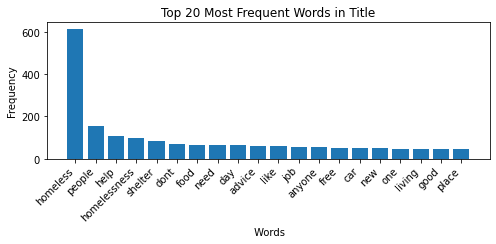

In [32]:
plotBarChart(top_20_postTitles, "Top 20 Most Frequent Words in Title")

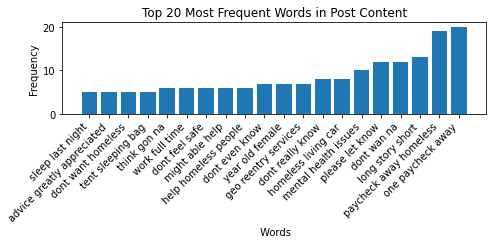

In [46]:
plotBarChart(top_20_postContent, "Top 20 Most Frequent Words in Post Content")

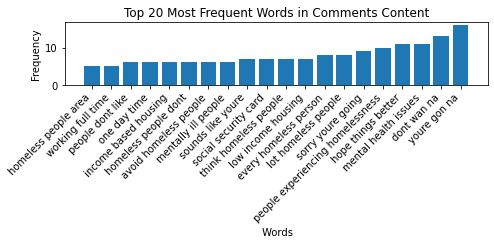

In [50]:
plotBarChart(top_20_Comment_Content, "Top 20 Most Frequent Words in Comments Content")